SLEEP HEALTH QUALITY OF SLEEP PREDICTION ANALYSIS
Dataset shape: (374, 25)
Dataset columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder_Insomnia', 'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea']

Target variable: Quality of Sleep

Feature matrix shape: (374, 24)
Target variable shape: (374,)
Target variable range: -2.771423737528191 to 1.4114353336402654
Target variable mean: 0.00

Training set size: 299 samples
Testing set size: 75 samples
Number of features: 24

1. RANDOM FOREST REGRESSION - Quality of Sleep Prediction
Fitti

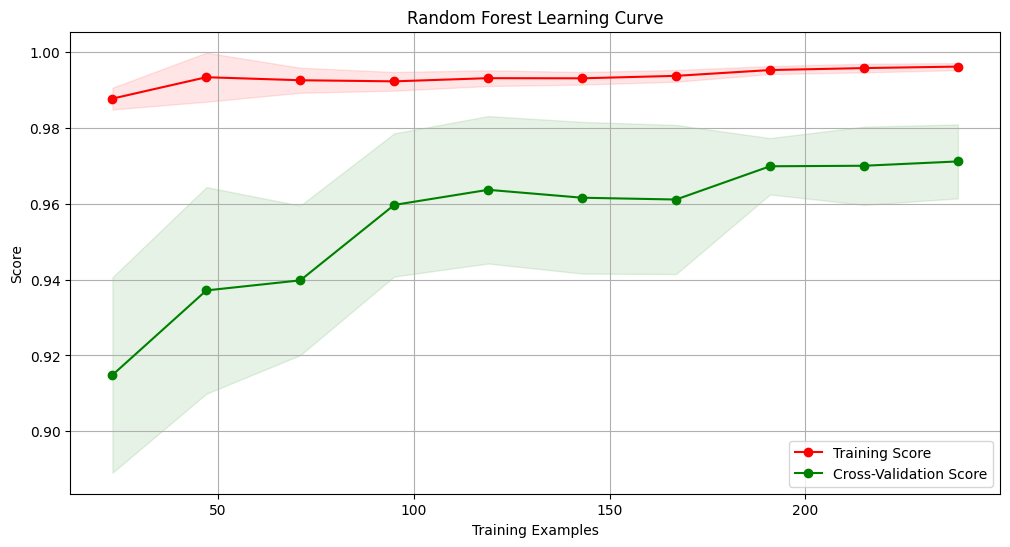


2. LINEAR REGRESSION - Quality of Sleep Prediction

Linear Regression Model Report:
Test Set MSE: 0.0684 (RMSE: 0.2616, R²: 0.9352, MAE: 0.1562)


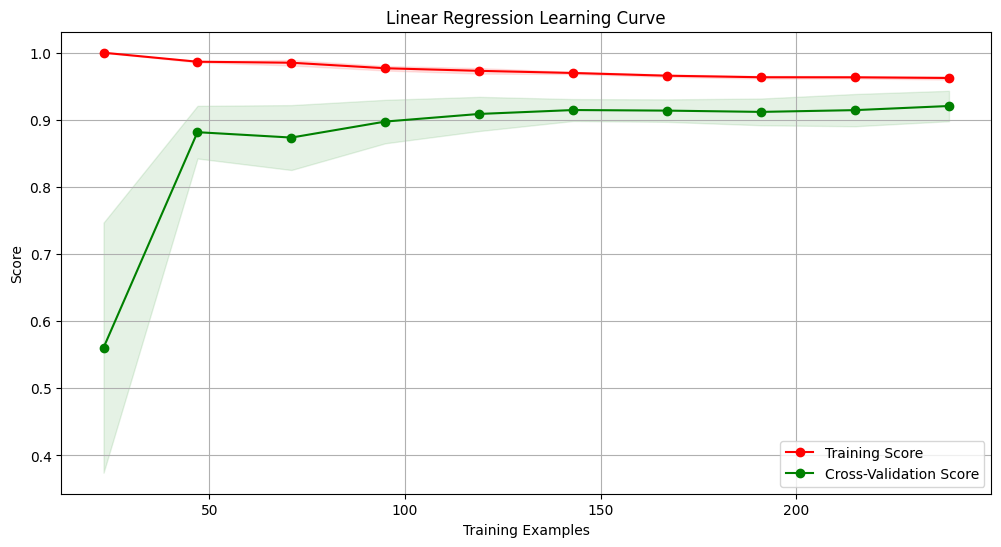


3. K-NEAREST NEIGHBORS (KNN) REGRESSION - Quality of Sleep Prediction
Fitting 5 folds for each of 28 candidates, totalling 140 fits

KNN Regression Best Model Report:
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Cross-Validation MSE: 0.0645
Test Set MSE: 0.0721 (RMSE: 0.2685, R²: 0.9317, MAE: 0.0565)


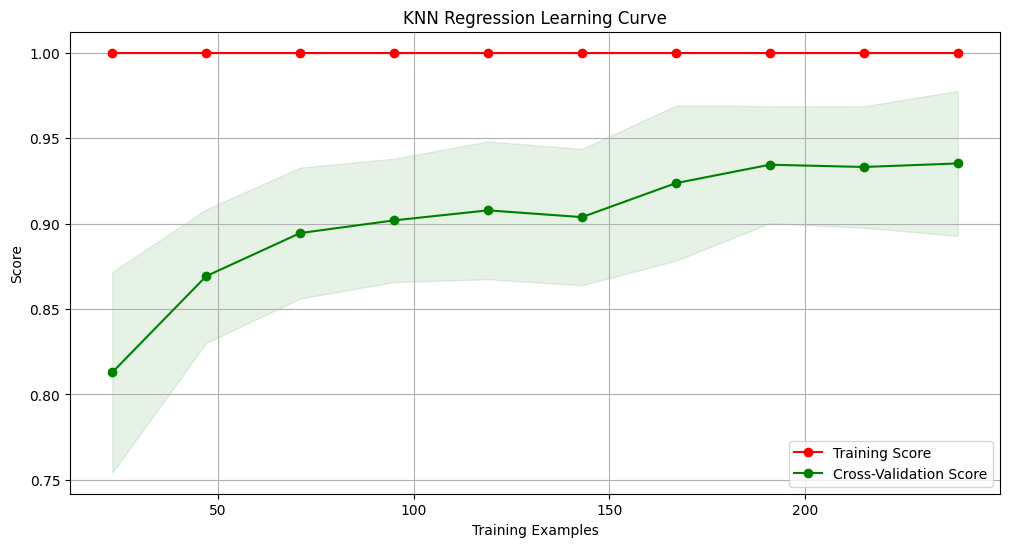


4. SUPPORT VECTOR REGRESSION (SVR) - Quality of Sleep Prediction
Fitting 5 folds for each of 24 candidates, totalling 120 fits

SVR Best Model Report:
Best Hyperparameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
Best Cross-Validation MSE: 0.0712
Test Set MSE: 0.0745 (RMSE: 0.2729, R²: 0.9294, MAE: 0.1091)


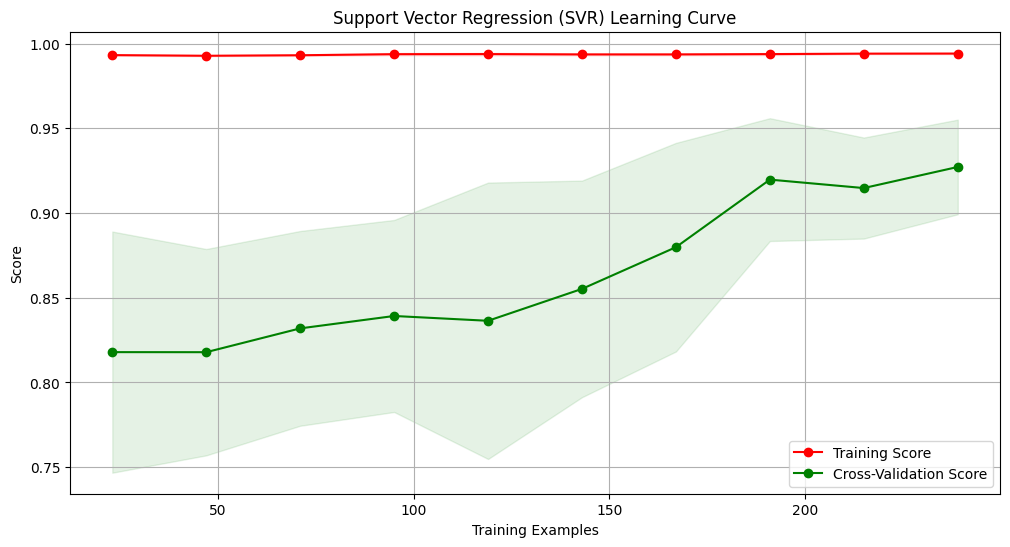


MODEL COMPARISON SUMMARY - Quality of Sleep Prediction

            Model      MSE     RMSE       R²      MAE                                                                         Best Parameters
    Random Forest 0.018642 0.136536 0.982343 0.037646 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Linear Regression 0.068423 0.261578 0.935194 0.156191                                                                                     N/A
   KNN Regression 0.072094 0.268504 0.931717 0.056502                       {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
              SVR 0.074492 0.272933 0.929446 0.109076                                             {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}


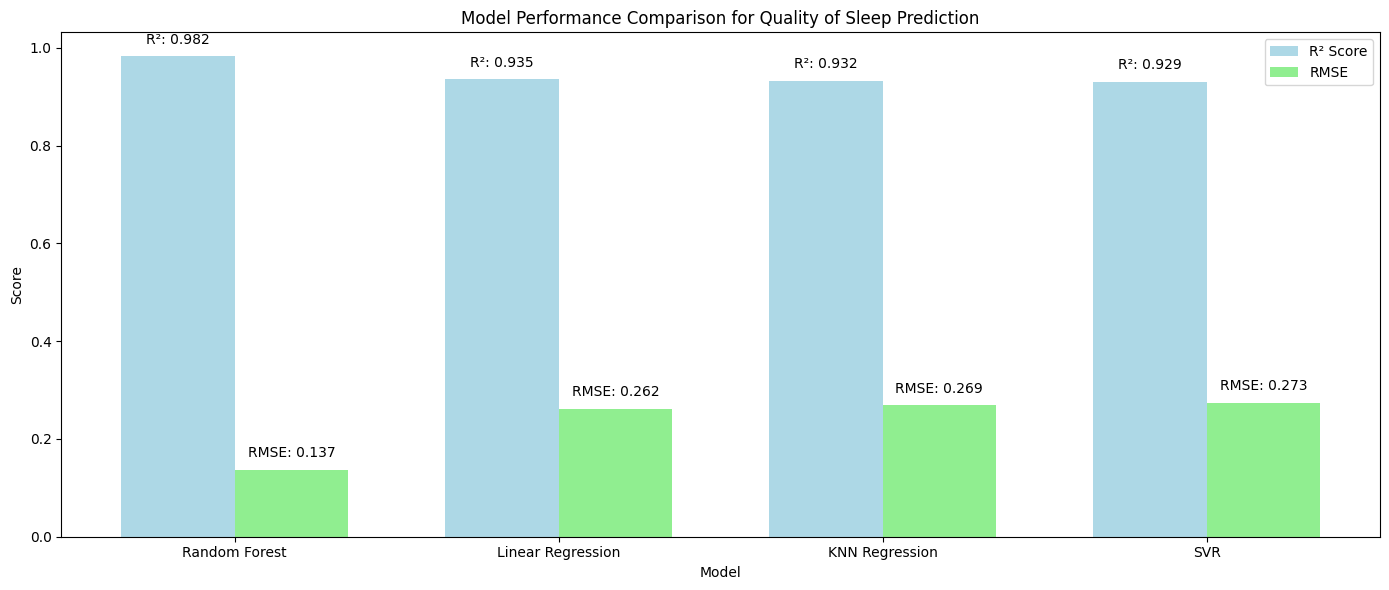


DETAILED ERROR ANALYSIS

Random Forest Error Analysis:
----------------------------------------
Mean Absolute Error (MAE): 0.0376
Root Mean Squared Error (RMSE): 0.1365
R² Score: 0.9823

Linear Regression Error Analysis:
----------------------------------------
Mean Absolute Error (MAE): 0.1562
Root Mean Squared Error (RMSE): 0.2616
R² Score: 0.9352

KNN Regression Error Analysis:
----------------------------------------
Mean Absolute Error (MAE): 0.0565
Root Mean Squared Error (RMSE): 0.2685
R² Score: 0.9317

SVR Error Analysis:
----------------------------------------
Mean Absolute Error (MAE): 0.1091
Root Mean Squared Error (RMSE): 0.2729
R² Score: 0.9294

FINAL RECOMMENDATIONS FOR QUALITY OF SLEEP PREDICTION

Best Performing Model: Random Forest
R² Score: 0.9823 (98.23%)

Model Selection Considerations:
1. Random Forest: More flexible, handles non-linear relationships well, provides feature importance
2. Linear Regression: Simple, interpretable, good for understanding feature impa

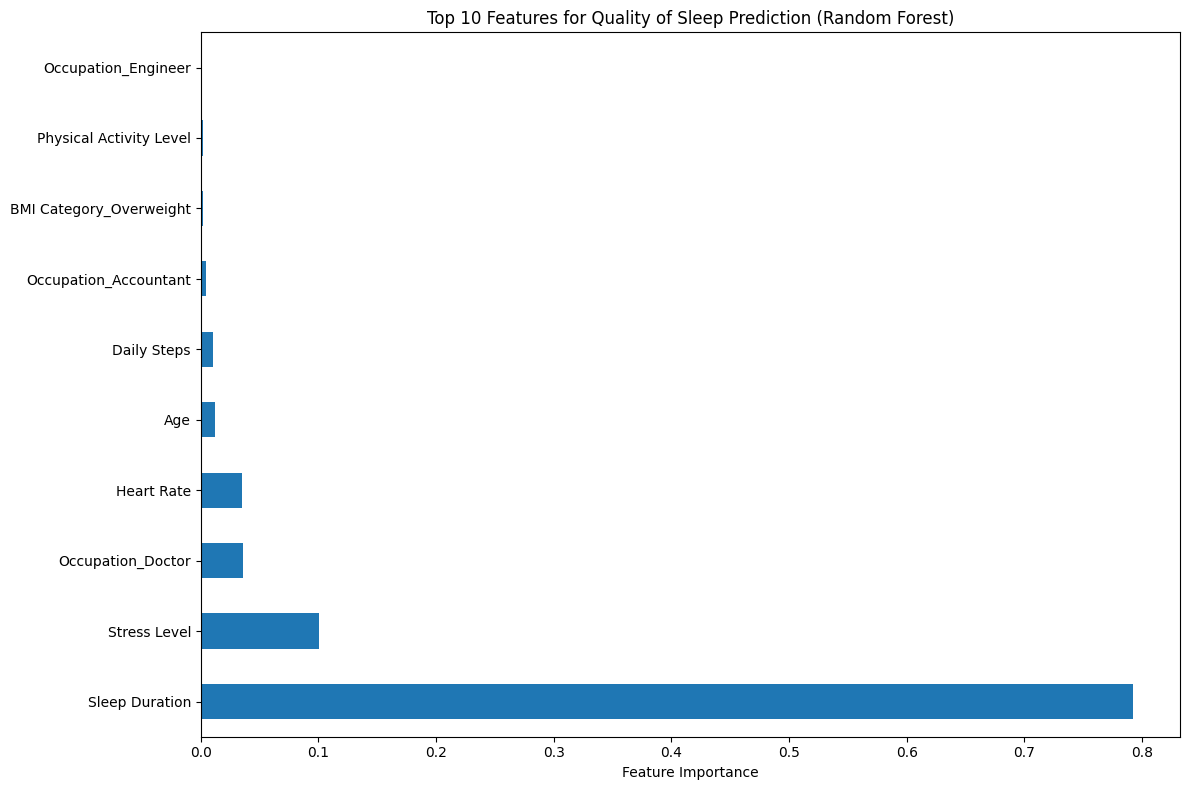

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, learning_curve)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

# Load the processed sleep health dataset
data = pd.read_csv('https://raw.githubusercontent.com/Salina-Huang/Programming-for-AI-Sleep-Health-and-Lifestyle-Model/refs/heads/main/sleep_health_encoded_onehot.csv')

print("SLEEP HEALTH QUALITY OF SLEEP PREDICTION ANALYSIS")
print("=" * 70)
print(f"Dataset shape: {data.shape}")
print(f"Dataset columns: {list(data.columns)}")

# Identify target variable (Quality of Sleep) - this is a continuous variable
target_variable = "Quality of Sleep"
print(f"\nTarget variable: {target_variable}")

# Create feature matrix and target variable
X = data.drop(columns=[target_variable])
y = data[target_variable]

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Target variable range: {y.min()} to {y.max()}")
print(f"Target variable mean: {y.mean():.2f}")

# Standardize features (required for many models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

# For unscaled data (if needed for other models)
X_train, X_test, _, _ = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining set size: {len(X_train_scaled)} samples")
print(f"Testing set size: {len(X_test_scaled)} samples")
print(f"Number of features: {X.shape[1]}")

# 1. Random Forest Regression with GridSearchCV
print("\n" + "="*70)
print("1. RANDOM FOREST REGRESSION - Quality of Sleep Prediction")
print("="*70)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and run GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
rf_grid_search.fit(X_train_scaled, y_train)

# Extract best model and results
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_
best_rf_score = -rf_grid_search.best_score_  # Convert from negative MSE to positive

# Evaluate on test set
best_rf_predict = best_rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, best_rf_predict)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, best_rf_predict)
rf_mae = mean_absolute_error(y_test, best_rf_predict)

print('\nRandom Forest Regression Best Model Report:')
print(f'Best Hyperparameters: {best_rf_params}')
print(f'Best Cross-Validation MSE: {best_rf_score:.4f}')
print(f'Test Set MSE: {rf_mse:.4f} (RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}, MAE: {rf_mae:.4f})')

# Learning curve for Random Forest
plt.figure(figsize=(12, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(True)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

# 2. Linear Regression
print("\n" + "="*70)
print("2. LINEAR REGRESSION - Quality of Sleep Prediction")
print("="*70)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate on test set
lr_predict = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predict)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predict)
lr_mae = mean_absolute_error(y_test, lr_predict)

print('\nLinear Regression Model Report:')
print(f'Test Set MSE: {lr_mse:.4f} (RMSE: {lr_rmse:.4f}, R²: {lr_r2:.4f}, MAE: {lr_mae:.4f})')

# Learning curve for Linear Regression
plt.figure(figsize=(12, 6))
plt.title('Linear Regression Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(True)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

# 3. K-Nearest Neighbors (KNN) Regression
print("\n" + "="*70)
print("3. K-NEAREST NEIGHBORS (KNN) REGRESSION - Quality of Sleep Prediction")
print("="*70)

# Define hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize and run GridSearchCV for KNN
knn_grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=knn_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
knn_grid_search.fit(X_train_scaled, y_train)

# Extract best model and results
best_knn_model = knn_grid_search.best_estimator_
best_knn_params = knn_grid_search.best_params_
best_knn_score = -knn_grid_search.best_score_

# Evaluate on test set
knn_predict = best_knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_predict)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_predict)
knn_mae = mean_absolute_error(y_test, knn_predict)

print('\nKNN Regression Best Model Report:')
print(f'Best Hyperparameters: {best_knn_params}')
print(f'Best Cross-Validation MSE: {best_knn_score:.4f}')
print(f'Test Set MSE: {knn_mse:.4f} (RMSE: {knn_rmse:.4f}, R²: {knn_r2:.4f}, MAE: {knn_mae:.4f})')

# Learning curve for KNN
plt.figure(figsize=(12, 6))
plt.title('KNN Regression Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(True)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

# 4. Support Vector Regression (SVR)
print("\n" + "="*70)
print("4. SUPPORT VECTOR REGRESSION (SVR) - Quality of Sleep Prediction")
print("="*70)

# Define hyperparameter grid for SVR
svr_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5]
}

# Initialize and run GridSearchCV for SVR
svr_grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=svr_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
svr_grid_search.fit(X_train_scaled, y_train)

# Extract best model and results
best_svr_model = svr_grid_search.best_estimator_
best_svr_params = svr_grid_search.best_params_
best_svr_score = -svr_grid_search.best_score_

# Evaluate on test set
svr_predict = best_svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predict)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_predict)
svr_mae = mean_absolute_error(y_test, svr_predict)

print('\nSVR Best Model Report:')
print(f'Best Hyperparameters: {best_svr_params}')
print(f'Best Cross-Validation MSE: {best_svr_score:.4f}')
print(f'Test Set MSE: {svr_mse:.4f} (RMSE: {svr_rmse:.4f}, R²: {svr_r2:.4f}, MAE: {svr_mae:.4f})')

# Learning curve for SVR
plt.figure(figsize=(12, 6))
plt.title('Support Vector Regression (SVR) Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(True)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_svr_model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

# Model Comparison Summary
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY - Quality of Sleep Prediction")
print("="*70)

models_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'KNN Regression', 'SVR'],
    'MSE': [rf_mse, lr_mse, knn_mse, svr_mse],
    'RMSE': [rf_rmse, lr_rmse, knn_rmse, svr_rmse],
    'R²': [rf_r2, lr_r2, knn_r2, svr_r2],
    'MAE': [rf_mae, lr_mae, knn_mae, svr_mae],
    'Best Parameters': [str(best_rf_params), 'N/A', str(best_knn_params), str(best_svr_params)]
})

print("\n" + models_summary.to_string(index=False))

# Visual comparison
plt.figure(figsize=(14, 6))
x = np.arange(len(models_summary))
width = 0.35

plt.bar(x - width/2, models_summary['R²'], width, label='R² Score', color='lightblue')
plt.bar(x + width/2, models_summary['RMSE'], width, label='RMSE', color='lightgreen')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison for Quality of Sleep Prediction')
plt.xticks(x, models_summary['Model'])
plt.legend()

# Add value labels
for i, (r2, rmse) in enumerate(zip(models_summary['R²'], models_summary['RMSE'])):
    plt.text(i - width/2, r2 + 0.02, f'R²: {r2:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, rmse + 0.02, f'RMSE: {rmse:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed Error Analysis
print("\n" + "="*70)
print("DETAILED ERROR ANALYSIS")
print("="*70)

print("\nRandom Forest Error Analysis:")
print("-" * 40)
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")
print(f"R² Score: {rf_r2:.4f}")

print("\nLinear Regression Error Analysis:")
print("-" * 40)
print(f"Mean Absolute Error (MAE): {lr_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
print(f"R² Score: {lr_r2:.4f}")

print("\nKNN Regression Error Analysis:")
print("-" * 40)
print(f"Mean Absolute Error (MAE): {knn_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {knn_rmse:.4f}")
print(f"R² Score: {knn_r2:.4f}")

print("\nSVR Error Analysis:")
print("-" * 40)
print(f"Mean Absolute Error (MAE): {svr_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {svr_rmse:.4f}")
print(f"R² Score: {svr_r2:.4f}")

# Final Recommendations
print("\n" + "="*70)
print("FINAL RECOMMENDATIONS FOR QUALITY OF SLEEP PREDICTION")
print("="*70)

best_model_idx = models_summary['R²'].idxmax()
best_model_name = models_summary.loc[best_model_idx, 'Model']
best_r2 = models_summary.loc[best_model_idx, 'R²']

print(f"\nBest Performing Model: {best_model_name}")
print(f"R² Score: {best_r2:.4f} ({best_r2*100:.2f}%)")

print("\nModel Selection Considerations:")
print("1. Random Forest: More flexible, handles non-linear relationships well, provides feature importance")
print("2. Linear Regression: Simple, interpretable, good for understanding feature impact")
print("3. KNN Regression: Instance-based learning, good for local patterns")
print("4. SVR: Effective for high-dimensional spaces, robust to outliers")
print(f"5. For Quality of Sleep prediction, {best_model_name} performed best with R² of {best_r2:.4f}")
print("="*70)

# Feature importance analysis
feature_importance = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("\nTop 10 Most Important Features for Quality of Sleep Prediction:")
print("-" * 70)
for feature, importance in feature_importance.head(10).items():
    print(f"{feature:<30}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance.head(10).plot(kind='barh')
plt.title('Top 10 Features for Quality of Sleep Prediction (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()